# Product Sales Analysis

### Libraries Import

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as stats
plt.style.use('fivethirtyeight')
%matplotlib inline

sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

### Data Validation

In [2]:
# Data Loading and Preview
product_sales_data = pd.read_csv('product_sales.csv')
print(product_sales_data.head())

   week  sales_method                           customer_id  nb_sold  revenue  years_as_customer  nb_site_visits      state
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN                  0              24    Arizona
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47                  1              28     Kansas
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55                  6              26  Wisconsin
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN                  3              25    Indiana
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49                  0              28   Illinois


In [3]:
# (# of rows and # columns of Dataframe) 
print(product_sales_data.shape)

(15000, 8)


In [4]:
# Data types check
print(product_sales_data.dtypes)

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object


In [5]:
# DataFrame Info
print(product_sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


In [6]:
# Dataframe columns
print(product_sales_data.columns)

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits', 'state'], dtype='object')


In [7]:
# Check of column containing Null values
print(product_sales_data.isna().values.any())

True


In [8]:
# Check for the total Null values in columns 
print(product_sales_data.isna().sum())

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


In [9]:
# Description of the DataFame
print(product_sales_data.describe())

               week       nb_sold       revenue  years_as_customer  nb_site_visits
count  15000.000000  15000.000000  13926.000000       15000.000000    15000.000000
mean       3.098267     10.084667     93.934943           4.965933       24.990867
std        1.656420      1.812213     47.435312           5.044952        3.500914
min        1.000000      7.000000     32.540000           0.000000       12.000000
25%        2.000000      9.000000     52.470000           1.000000       23.000000
50%        3.000000     10.000000     89.500000           3.000000       25.000000
75%        5.000000     11.000000    107.327500           7.000000       27.000000
max        6.000000     16.000000    238.320000          63.000000       41.000000


### Consistency check and fixing

In [10]:
# Checks on Sales Method columns
print(product_sales_data['sales_method'].value_counts())

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64


In [11]:
# Using dictionary to correct inconsistent values in Sales Method 
sales_method_mapping = {
    'Email': 'Email',
    'Call': 'Call',
    'Email + Call': 'Email + Call',
    'em + call': 'Email + Call',
    'email': 'Email'
}

# Apply the mapping to the 'sales_method' column
product_sales_data['sales_method'] = product_sales_data['sales_method'].map(sales_method_mapping)

# Verification of the sales method column
print(product_sales_data['sales_method'].value_counts())

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64


In [12]:
# Unique values check in Customer ID column
print(product_sales_data['customer_id'].nunique())

15000


In [13]:
# Checking on the State column
print('Number of states is:', product_sales_data['state'].nunique(), '\n')

print('List of states and count \n', product_sales_data['state'].value_counts())

Number of states is: 50 

List of states and count 
 California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New 

In [14]:
# Computing for mean revenue for each sales method
mean_revenue_by_sales_method = product_sales_data.groupby('sales_method')['revenue'].mean()
print(mean_revenue_by_sales_method)

sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
Name: revenue, dtype: float64


In [15]:
# Replace Null values with the mean value for each sales method. First defining a function
def replace_null_revenue(row):
    if pd.isnull(row['revenue']):
        return mean_revenue_by_sales_method[row['sales_method']]
    else:
        return row['revenue']

In [16]:
# Apply function to the revenue column
product_sales_data['revenue'] = product_sales_data.apply(replace_null_revenue, axis=1)

# check for any null values in the revenue column
print(product_sales_data['revenue'].isnull().sum())

0


In [17]:
# Checking on the rows with inconsistent values
product_sales_data[product_sales_data['years_as_customer'] > 41]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [18]:
# Replacing all values > 41 with the maximum value, 41 
product_sales_data.loc[product_sales_data['years_as_customer'] > 41, 'years_as_customer'] = 41


# Checking to see if replacement is successful
product_sales_data[product_sales_data['years_as_customer'] > 41]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


## Duplicate rows checking

In [19]:
# check if any duplicate rows
duplicated_rows = product_sales_data[product_sales_data.duplicated()]
duplicated_rows

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [20]:
print(product_sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


In [21]:
print(product_sales_data.describe())

               week       nb_sold       revenue  years_as_customer  nb_site_visits
count  15000.000000  15000.000000  15000.000000       15000.000000    15000.000000
mean       3.098267     10.084667     95.578993           4.964067       24.990867
std        1.656420      1.812213     47.956792           5.028153        3.500914
min        1.000000      7.000000     32.540000           0.000000       12.000000
25%        2.000000      9.000000     52.650000           1.000000       23.000000
50%        3.000000     10.000000     90.950000           3.000000       25.000000
75%        5.000000     11.000000    107.750000           7.000000       27.000000
max        6.000000     16.000000    238.320000          41.000000       41.000000


## Exploratory Data Analysis

### Number of Customers per Sales Method:

In [22]:
customer_counts = product_sales_data.groupby('sales_method')['customer_id'].nunique()
print(customer_counts)

sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64


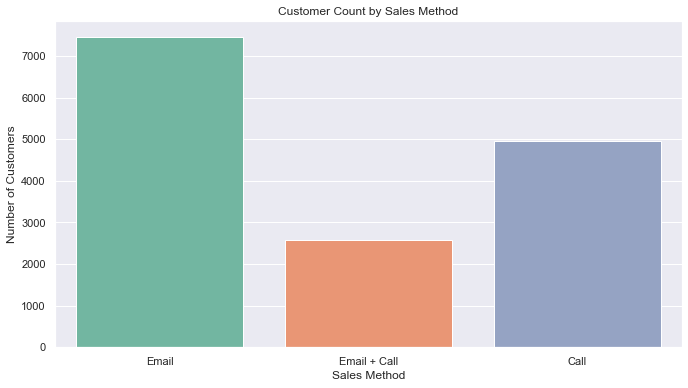

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=product_sales_data, x='sales_method', palette='Set2')
plt.title("Customer Count by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Number of Customers")
plt.show()

### Revenue Distribution

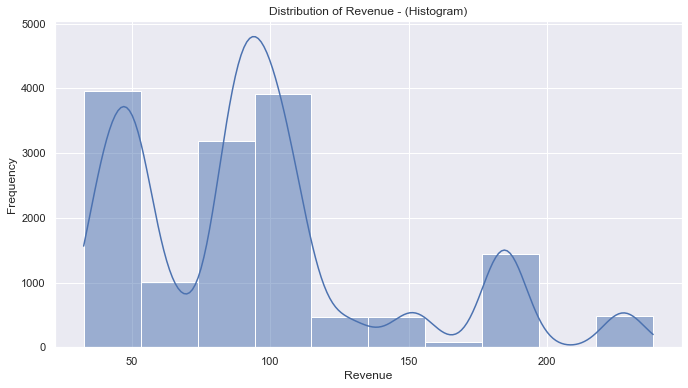

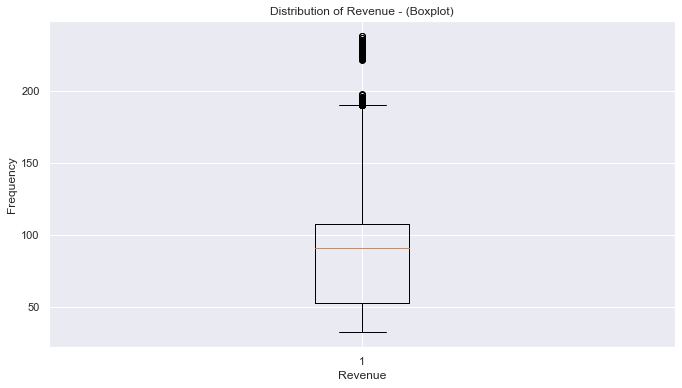

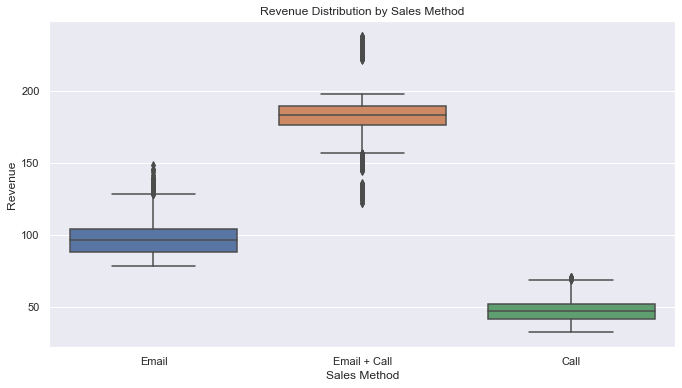

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(product_sales_data['revenue'], bins=10, kde=True)
plt.title('Distribution of Revenue - (Histogram)')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
#sns.boxplot(x='revenue', data=product_sales_data)
plt.boxplot(product_sales_data['revenue'])
plt.title('Distribution of Revenue - (Boxplot)')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_method', y='revenue', data=product_sales_data)
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

### Revenue Overtime

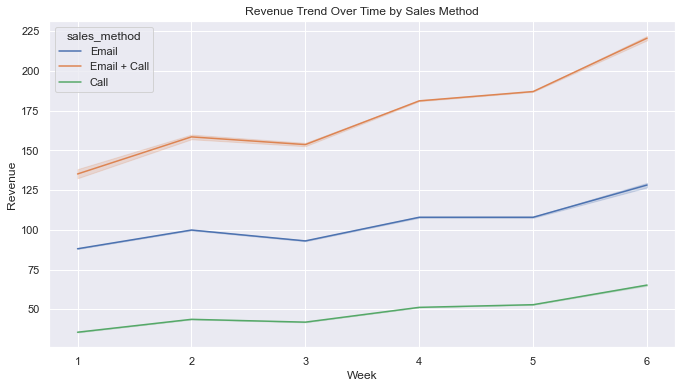

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='week', y='revenue', hue='sales_method', data=product_sales_data)
plt.title('Revenue Trend Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.show()

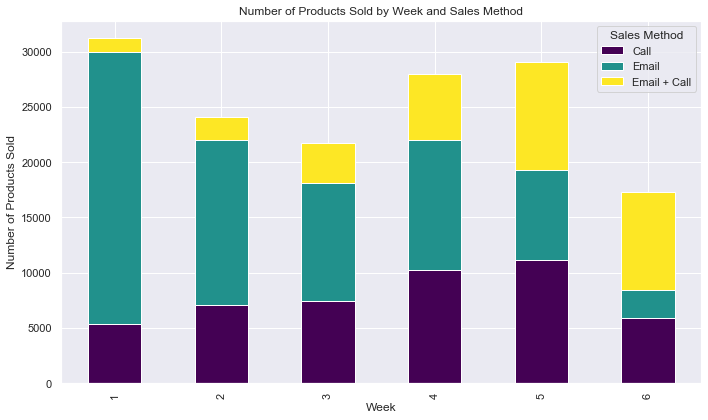

In [26]:
stacked_data = product_sales_data.groupby(['week', 'sales_method'])['nb_sold'].sum().unstack()
stacked_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Number of Products Sold by Week and Sales Method")
plt.xlabel("Week")
plt.ylabel("Number of Products Sold")
plt.legend(title="Sales Method")
plt.tight_layout()
plt.show()

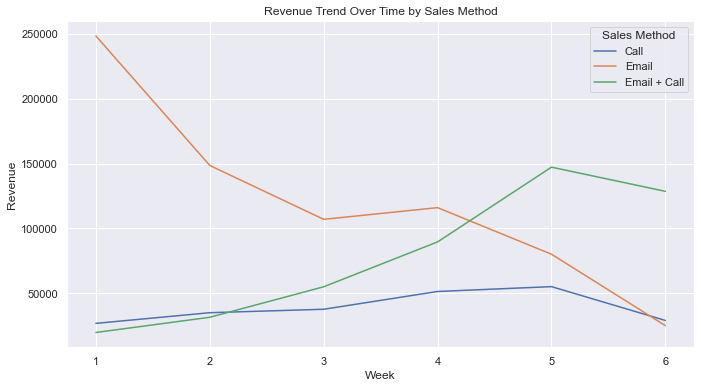

In [27]:
revenue_overtime = product_sales_data.groupby(['week', 'sales_method'])['revenue'].sum().unstack() 
ax = revenue_overtime.plot(figsize=(10, 6)) 
plt.title('Revenue Trend Over Time by Sales Method') 
plt.xlabel('Week') 
plt.ylabel('Revenue') 
ax.legend(title='Sales Method') 
plt.show()

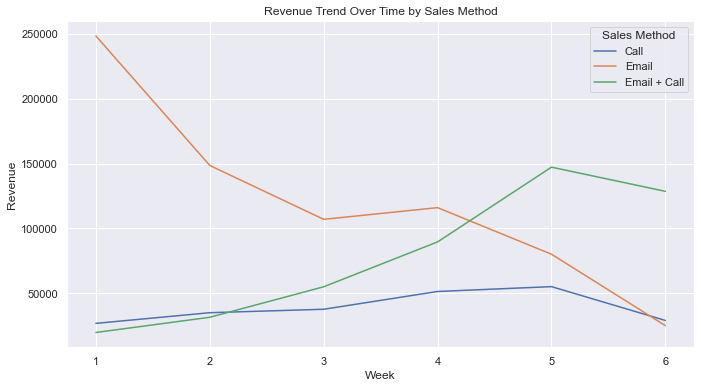

In [28]:
data = pd.DataFrame(revenue_overtime)
ax = data.plot(figsize=(10, 6)) 
plt.title('Revenue Trend Over Time by Sales Method') 
plt.xlabel('Week') 
plt.ylabel('Revenue') 
ax.legend(title='Sales Method') 
plt.show()

### Customer Characteristics

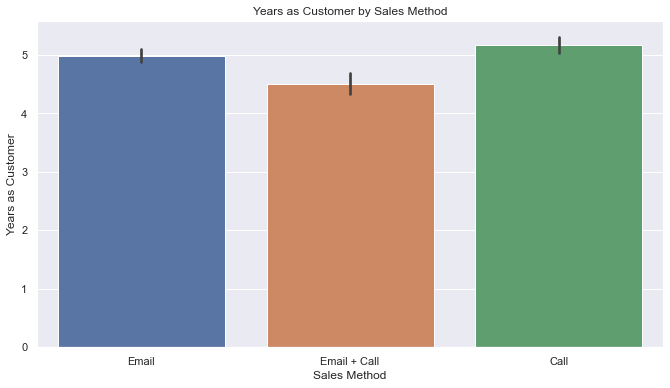

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='years_as_customer', data=product_sales_data)
plt.title('Years as Customer by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')
plt.show()

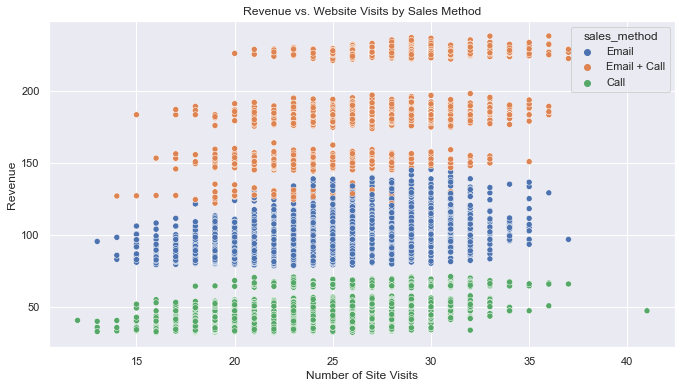

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nb_site_visits', y='revenue', hue='sales_method', data=product_sales_data)
plt.title('Revenue vs. Website Visits by Sales Method')
plt.xlabel('Number of Site Visits')
plt.ylabel('Revenue')
plt.show()

In [31]:
customer_cou = product_sales_data.groupby('sales_method')['years_as_customer'].sum()
print(customer_cou)

sales_method
Call            25681
Email           37187
Email + Call    11593
Name: years_as_customer, dtype: int64


In [32]:
print(product_sales_data.groupby(['week', 'sales_method'])['revenue'].sum().unstack())

sales_method          Call          Email   Email + Call
week                                                    
1             27015.934407  248122.682313   20007.400954
2             35219.944012  148478.487577   31702.115744
3             37865.583880  107047.993157   55164.933140
4             51545.486149  116044.223157   89682.576419
5             55279.216281   80201.111052  147195.006815
6             29252.466808   25260.792947  128598.937094


In [33]:
product_sales_data['years_as_customer'].min()

0

In [34]:
# Define the sales effort for each sales method
sales_effort = {
    'Email': 0.5,
    'Call': 3,
    'Email + Call': 1
}

# Group the data by sales_method and aggregate the total revenue and number of customers
grouped_data = product_sales_data.groupby('sales_method').agg({'revenue': 'sum', 'customer_id': 'count'}).reset_index()

# Calculate ARCPSE for each sales method
grouped_data['ARCPSE'] = grouped_data.apply(lambda row: row['revenue'] / (row['customer_id'] * sales_effort[row['sales_method']]), axis=1)

# Display the ARCPSE for each sales method
print(grouped_data[['sales_method', 'ARCPSE']])

   sales_method      ARCPSE
0          Call   15.865822
1         Email  194.255368
2  Email + Call  183.651233


In [35]:
# Calculate the number of customers contacted for each method
customers_contacted = product_sales_data.groupby('sales_method')['customer_id'].nunique()

# Calculate the number of customers who made purchases for each method
customers_purchased = product_sales_data[product_sales_data['nb_sold'] > 0].groupby('sales_method')['customer_id'].nunique()

# Calculate the conversion rate for each method
conversion_rate = customers_purchased / customers_contacted

print(conversion_rate)

sales_method
Call            1.0
Email           1.0
Email + Call    1.0
Name: customer_id, dtype: float64


In [36]:
customers_purchased_g = product_sales_data.groupby('sales_method').agg({'nb_sold': 'sum', 'customer_id': 'count'}).reset_index()
print(customers_purchased_g)

   sales_method  nb_sold  customer_id
0          Call    47187         4962
1         Email    72639         7466
2  Email + Call    31444         2572


In [37]:
# Group the data by sales_method and aggregate the total revenue and number of customers
customers_purchased_g = product_sales_data.groupby('sales_method').agg({'nb_sold': 'sum', 'customer_id': 'count'}).reset_index()

# Calculate ARCPSE for each sales method
customers_purchased_g['conversion'] = customers_purchased_g.apply(lambda row: row['nb_sold'] / row['customer_id'], axis=1)

# Display the ARCPSE for each sales method
print(customers_purchased_g[['sales_method', 'conversion']])

   sales_method  conversion
0          Call    9.509674
1         Email    9.729306
2  Email + Call   12.225505


In [38]:
# Group the data by sales_method and aggregate the total revenue and number of customers
customers_purchased_g = product_sales_data.groupby('sales_method').agg({'nb_sold': 'sum', 'customer_id': 'count'}).reset_index()

# Calculate ARCPSE for each sales method
customers_purchased_g['conversion'] = customers_purchased_g.apply(lambda row: row['nb_sold'] / row['customer_id'], axis=1)

# Display the ARCPSE for each sales method
print(customers_purchased_g[['sales_method', 'conversion']])


   sales_method  conversion
0          Call    9.509674
1         Email    9.729306
2  Email + Call   12.225505
